In [10]:
import pandas as pd



In [11]:
df_before_optimization= pd.read_csv("../data/evaluation_before_optimization_2.csv")
df2_before_optimization= pd.read_csv("../data/evaluation_before_optimization_1.csv")
df_after_optimization= pd.read_csv("../data/evaluation_after_optimization_2.csv")
df2_after_optimization= pd.read_csv("../data/evaluation_after_optimization_1.csv")


In [12]:
df_before_optimization = pd.concat([df_before_optimization_1, df_before_optimization_2], ignore_index=True)
df_after_optimization = pd.concat([df_after_optimization_1, df_after_optimization_2], ignore_index=True)

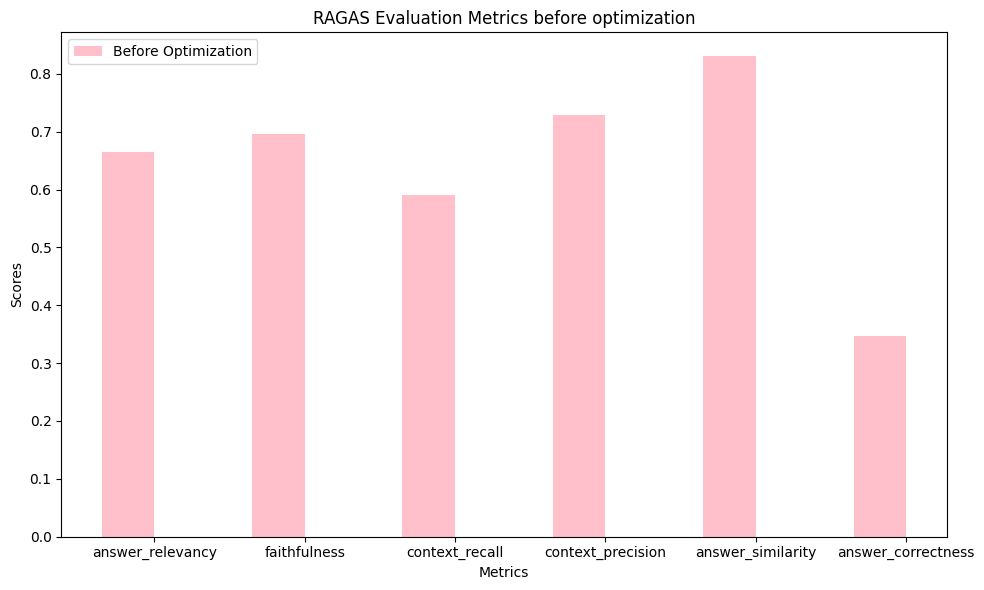

In [22]:
columns_to_compare = ["answer_relevancy", "faithfulness", "context_recall", "context_precision", "answer_similarity", "answer_correctness"]

# Calculate mean values for each column before and after optimization
before_means = df_before_optimization[columns_to_compare].mean()
after_means = df_after_optimization[columns_to_compare].mean()

# Plotting the results
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(columns_to_compare))

# Bars for before optimization
plt.bar(index, before_means, bar_width, label='Before Optimization', color='pink')



# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('RAGAS Evaluation Metrics before optimization')
plt.xticks([i + bar_width / 2 for i in index], columns_to_compare)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

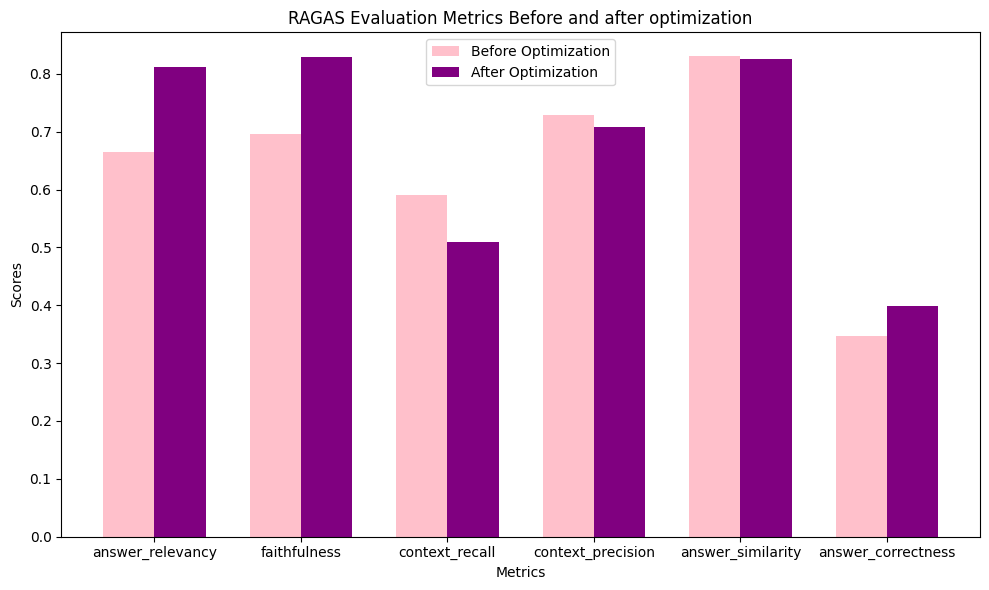

In [18]:
columns_to_compare = ["answer_relevancy", "faithfulness", "context_recall", "context_precision", "answer_similarity", "answer_correctness"]

# Calculate mean values for each column before and after optimization
before_means = df_before_optimization[columns_to_compare].mean()
after_means = df_after_optimization[columns_to_compare].mean()

# Plotting the results
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(columns_to_compare))

# Bars for before optimization
plt.bar(index, before_means, bar_width, label='Before Optimization', color='pink')

# Bars for after optimization
plt.bar([i + bar_width for i in index], after_means, bar_width, label='After Optimization', color="purple")

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('RAGAS Evaluation Metrics Before and after optimization')
plt.xticks([i + bar_width / 2 for i in index], columns_to_compare)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

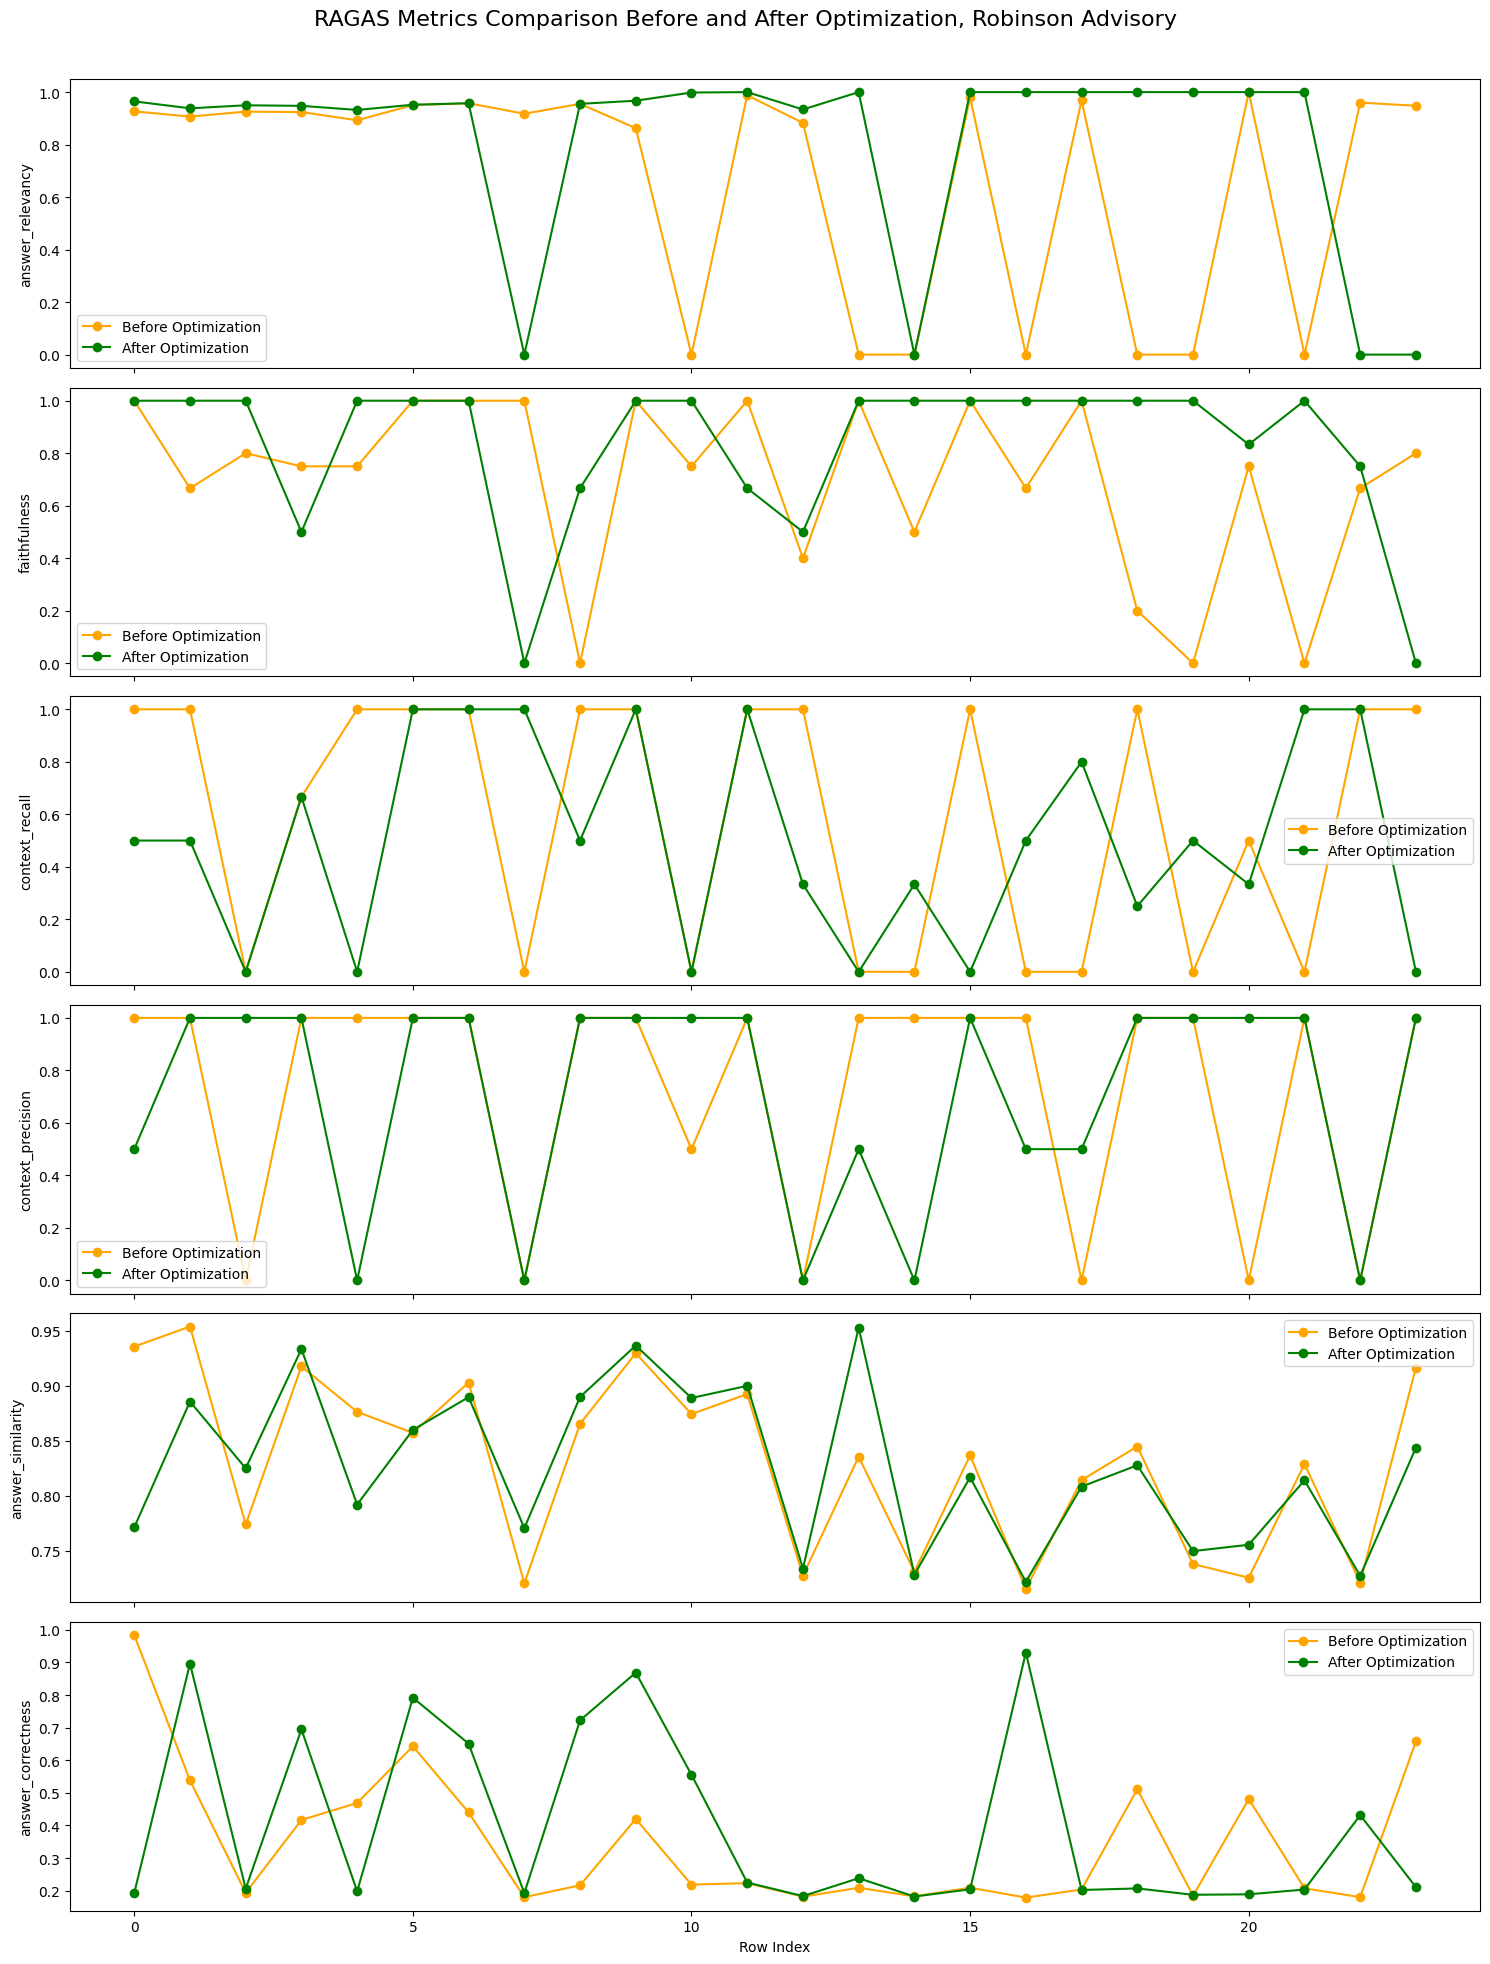

In [21]:
import numpy as np

metrics = ["answer_relevancy", "faithfulness", "context_recall", "context_precision", "answer_similarity", "answer_correctness"]

# Number of rows in the data
num_rows = df_before_optimization.shape[0]

# Create subplots
fig, axs = plt.subplots(len(metrics), figsize=(15, 20), sharex=True)
fig.suptitle('RAGAS Metrics Comparison Before and After Optimization, Robinson Advisory', fontsize=16)

# Plot each metric
for i, metric in enumerate(metrics):
    axs[i].plot(np.arange(num_rows), df_before_optimization[metric], label='Before Optimization', marker='o', color="orange")
    axs[i].plot(np.arange(num_rows), df_after_optimization[metric], label='After Optimization', marker='o', color="green")
    axs[i].set_ylabel(metric)
    axs[i].legend()

# Set x-axis label for the last subplot
axs[-1].set_xlabel('Row Index')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [15]:
for metric in metrics:
    before = df_before_optimization[metric]
    after = df_after_optimization[metric]
    difference = after - before
    print(f"Difference in {metric} before and after optimization:")
    print(difference)
    print("\n")

# Optionally, save the differences to a new DataFrame and CSV
df_differences = df_after_optimization.copy()
for metric in metrics:
    df_differences[metric] = df_after_optimization[metric] - df_before_optimization[metric]

# Save to CSV
df_differences.to_csv("../data/evaluation_differences.csv", index=False)

print("Differences saved to evaluation_differences.csv")


Difference in answer_relevancy before and after optimization:
0     0.038100
1     0.031586
2     0.024238
3     0.023639
4     0.039339
5     0.001411
6     0.000000
7    -0.917677
8     0.000000
9     0.104554
10    0.998469
11    0.012167
12    0.050974
13    1.000000
14    0.000000
15    0.020361
16    0.999999
17    0.031233
18    1.000000
19    1.000000
20    0.000000
21    1.000000
22   -0.960096
23   -0.948003
Name: answer_relevancy, dtype: float64


Difference in faithfulness before and after optimization:
0     0.000000
1     0.333333
2     0.200000
3    -0.250000
4     0.250000
5     0.000000
6     0.000000
7    -1.000000
8     0.666667
9     0.000000
10    0.250000
11   -0.333333
12    0.100000
13    0.000000
14    0.500000
15    0.000000
16    0.333333
17    0.000000
18    0.800000
19    1.000000
20    0.083333
21    1.000000
22    0.083333
23   -0.800000
Name: faithfulness, dtype: float64


Difference in context_recall before and after optimization:
0    -0.500000
1    -0

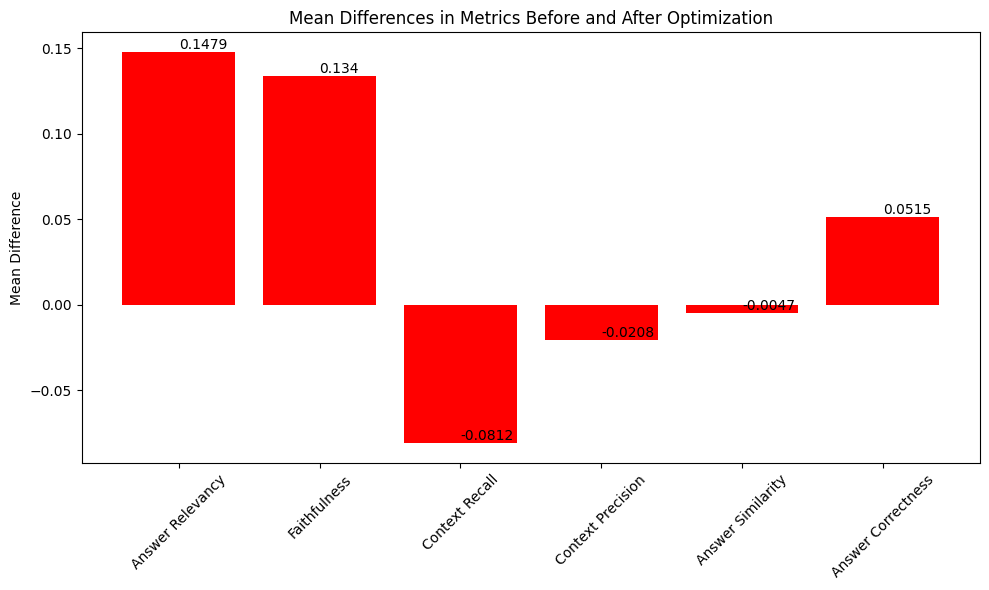

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean differences
mean_differences = {
    "Answer Relevancy": df_differences["answer_relevancy"].mean(),
    "Faithfulness": df_differences["faithfulness"].mean(),
    "Context Recall": df_differences["context_recall"].mean(),
    "Context Precision": df_differences["context_precision"].mean(),
    "Answer Similarity": df_differences["answer_similarity"].mean(),
    "Answer Correctness": df_differences["answer_correctness"].mean()
}

# Plotting
metrics = list(mean_differences.keys())
values = list(mean_differences.values())

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(metrics, values, color='red')

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), va='bottom') 

plt.ylabel('Mean Difference')
plt.title('Mean Differences in Metrics Before and After Optimization')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
